# Computer Vision - P3

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 1st, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images/screenshot.png" width=600>

## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [4]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import img_as_float
from skimage.exposure import histogram
from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift

In [2]:
#Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

In [3]:
# Reading a sequence of images from a folder
ic = io.ImageCollection('images/Barcelona-sequence/*.png')

<IPython.core.display.Javascript object>


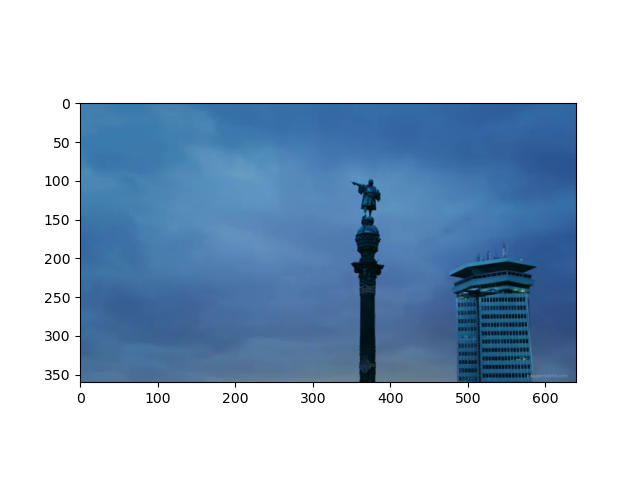

In [4]:
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images/histogramshot.png" width=600>
<img src="images/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

<IPython.core.display.Javascript object>


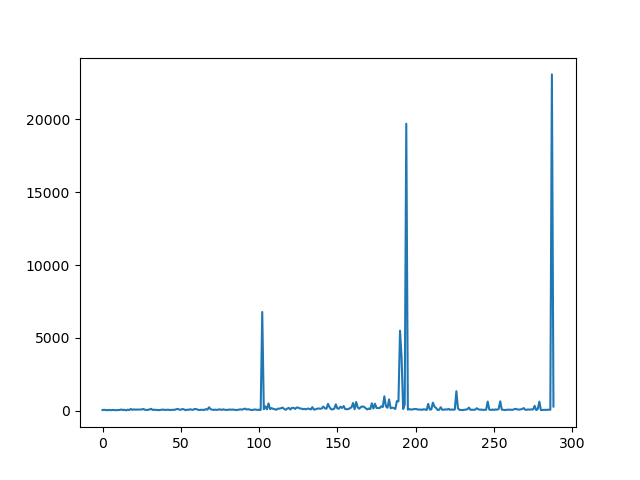

In [38]:
from skimage.exposure import histogram
from skimage import img_as_float
fig = plt.figure() 
numberOfBins = 16
hst_r, bins_r = histogram( img_as_float(ic[0][:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(ic[0][:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(ic[0][:,:,2]), nbins=numberOfBins)
previous_hst= np.concatenate((hst_r,hst_g,hst_b))
vect=[]
x=range(289)
for i in range(1,len(ic)):
     
    hst_r2, bins_r = histogram( img_as_float(ic[i][:,:,0]), nbins=numberOfBins)
    hst_g2, bins_g = histogram( img_as_float(ic[i][:,:,1]), nbins=numberOfBins)
    hst_b2, bins_b = histogram( img_as_float(ic[i][:,:,2]), nbins=numberOfBins)
    
    current_hst= np.concatenate((hst_r2,hst_g2,hst_b2))
    
    hst_diff = np.mean(np.abs(previous_hst - current_hst))
    vect.append(hst_diff)
    previous_hst = current_hst
    
    hst_diff=0
plt.plot(vect)
plt.show()

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [6]:
# Example A
def data_gen():
    t = data_gen.t
    numberOfBins = 16
    hst_r, bins_r = histogram( img_as_float(ic[0][:,:,0]), nbins=numberOfBins)
    hst_g, bins_g = histogram( img_as_float(ic[0][:,:,1]), nbins=numberOfBins)
    hst_b, bins_b = histogram( img_as_float(ic[0][:,:,2]), nbins=numberOfBins)
    previous_hst= np.concatenate((hst_r,hst_g,hst_b))
    for i in range(1,len(ic)):
        t += 1
     
        hst_r2, bins_r = histogram( img_as_float(ic[i][:,:,0]), nbins=numberOfBins)
        hst_g2, bins_g = histogram( img_as_float(ic[i][:,:,1]), nbins=numberOfBins)
        hst_b2, bins_b = histogram( img_as_float(ic[i][:,:,2]), nbins=numberOfBins)

        current_hst= np.concatenate((hst_r2,hst_g2,hst_b2))

        hst_diff = np.mean(np.abs(previous_hst - current_hst))

        previous_hst = current_hst
        yield t, hst_diff
        
data_gen.t=0


<IPython.core.display.Javascript object>


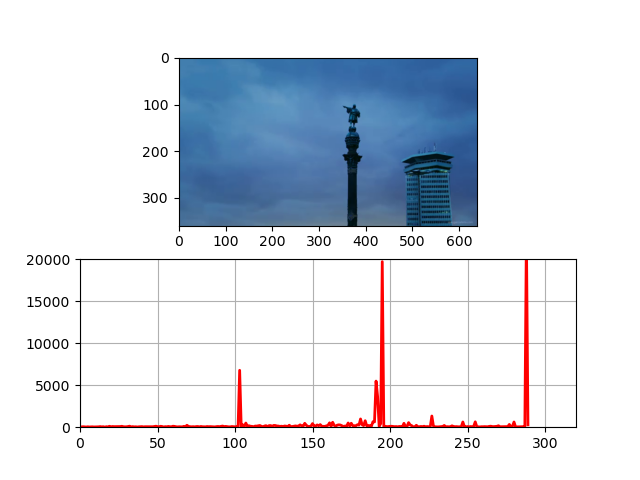

In [7]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 20000)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=5, repeat=False)
plt.show()

In [8]:
# Your solution here
# We did this exercise in the cell above this one

c) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot.


<IPython.core.display.Javascript object>


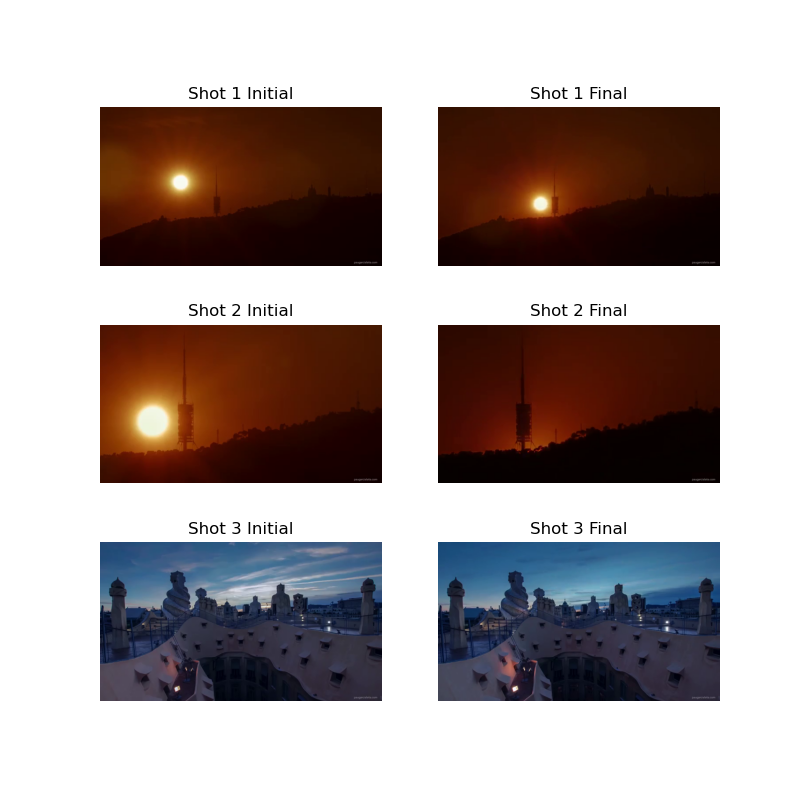

In [15]:
# Your solution here
threshold = 6500
initial_shots = [0]
for i in range(len(xdata)):
    if(ydata[i] >= threshold):
        initial_shots.append(xdata[i])
num_shots = len(initial_shots)
   
        
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(8,8))
ending = initial_shots[0] - 1
for i in range(min(num_shots, 4)):
    if(i == num_shots - 1):
        final = len(ic) - 1
    else:
        final = initial_shots[i+1] - 1
        ax = axs[i, 0]
        ax.imshow(ic[initial_shots[i]])
        ax.set_title('Shot ' + str(i+1) + ' Initial') # We set the title
        ax.axis('off')

        ax = axs[i,1]
        ax.imshow(ic[final])
        ax.set_title('Shot ' + str(i+1) + ' Final')
        ax.axis('off')

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [ ]:
# Your solution here
""" 
we set a 6500 threshold in order to detect the transitions frames, if we look at the plot we can distinguish the 3 transitions
in the plot beacuse there are 3 distingued peaks in it
"""

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [ ]:
# Your solution here
"""
Yes, but we have to split the frame in different subframes in order to detect where is the object we are trackking
"""

f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [ ]:
# Your solution here
"""
It depends, because if the difference between the transitions frames is below the threshold, then the strategy applied will 
not detect the transition
"""

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

<IPython.core.display.Javascript object>


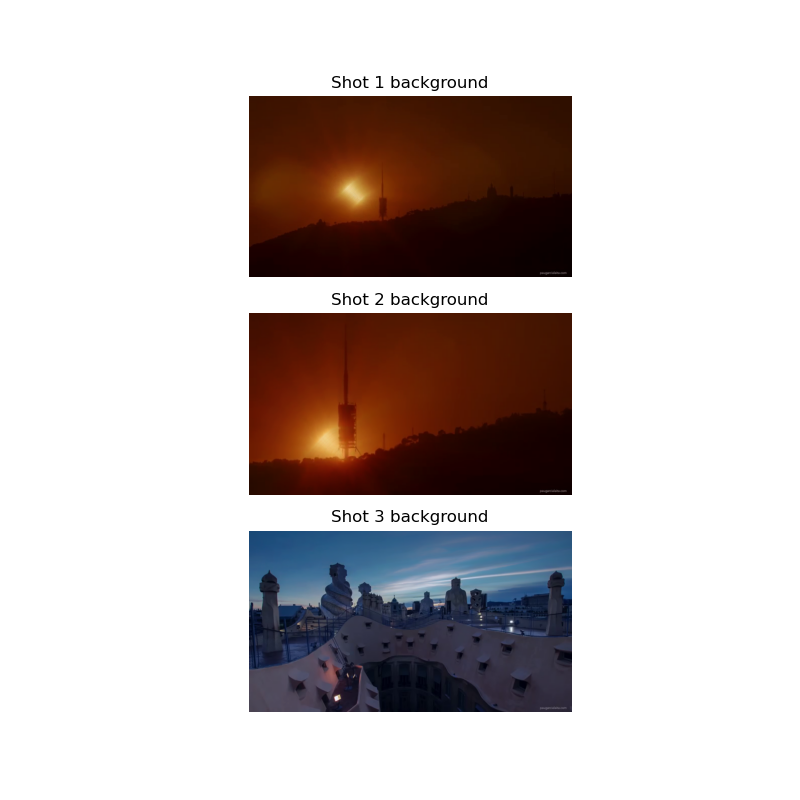

In [14]:
# Your solution here

# Function that, for each pixel, computes the median between the whole set of images. That will be the background.
def get_background(shot_frames):
    background = np.zeros(shot_frames[0].shape + (len(shot_frames),)) #all images have the same shape, we add one dimension
    
    for i in range(len(shot_frames)): background[:,:,:,i] = shot_frames[i]

    background = np.median(background, axis = 3)
    return background.astype(np.int)

fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(8,8))
results = []
for i in range(len(initial_shots)-1):
    result = get_background(ic[initial_shots[i] : initial_shots[i+1]])
    results += [result]
    
    ax = axs[i]
    ax.imshow(result)
    ax.set_title('Shot ' + str(i+1) + ' background') # We set the title
    ax.axis('off')
    
plt.show()

<IPython.core.display.Javascript object>


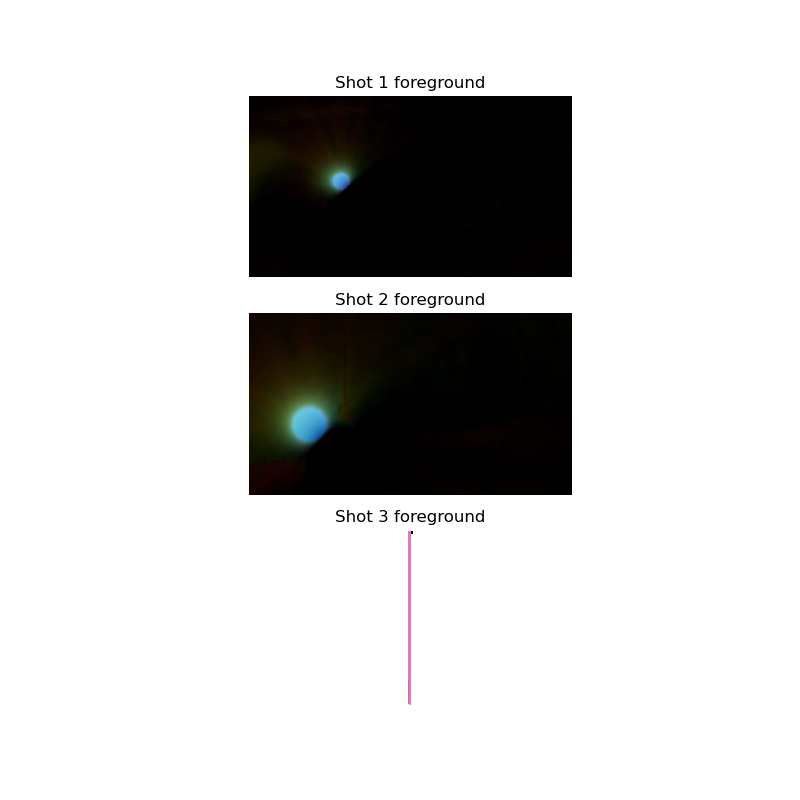

In [17]:
def get_foreground(background, image):
    result = image - background
    result[result < 0] = 0
    return result;

# We show the foreground for the beginning and ending of every shot.
fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(8,8))
for i in range(len(initial_shots)-1):
    ax = axs[i]
    ax.imshow(get_foreground(results[i], ic[initial_shots[i]]))
    ax.set_title('Shot ' + str(i+1) + ' foreground') # We set the title
    ax.axis('off')
    
plt.show()

b) What do the static background images represent? 

In [ ]:
# Your solution here
"""
The static background images represent the background of the video scene (the image that never change in the video fragmen).
For example, if the video is from a surveillance camera, the background will be the place it surveils, without the elements
that appear from now and then on camera.
"""

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [ ]:
# Your solution here
"""
If the extraction is not correct, then we'll have problems to do the mean of pixels of the background and we going to get
a background image far from reality.

If we have too many shots in the video, we will have less information about each shot so it will be more difficult to get 
an accurate representation of the background.
"""

d) What happens if you subtract the background image from the original one?

In [ ]:
# Your solution here
"""
You will get  the elements not belonging to the background, what means that, in a shot, you will get the elements that 
appear and disappear in the image
"""

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [ ]:
# Your solution here
"""
The algorithm woorks at its best when there are a lot of images with the pixels of the background not changing, if there is 
many variations in the frame set, then it will work worse.
Yes, we can use the algorithm to detect objects or movement for example.
"""

f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [ ]:
# Your solution here


## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


(256, 192)
Felzenszwalb number of segments: 231


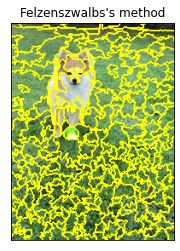

In [5]:
from skimage.transform import rescale, resize, downscale_local_mean

img = io.imread('images/rocki.jpeg')
img = resize(img, (img.shape[0] // 4, img.shape[1] // 4))
segments_fz = felzenszwalb(img, scale=50, sigma=0.5, min_size=50)

print(segments_fz.shape)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")

plt.imshow(mark_boundaries(img, segments_fz)) 
plt.title("Felzenszwalbs's method")
plt.xticks([])
plt.yticks([])
plt.show()

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



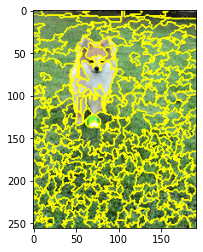

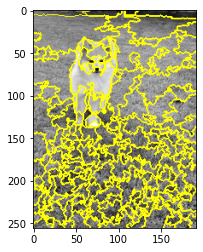

In [7]:
from skimage.color import rgb2gray

img_float = img_as_float(img)
img_grayscale = rgb2gray(img)

# Segmentation with the image in grayscale
felzenszwalb_gray = felzenszwalb(img_grayscale, scale=50, sigma=0.5, min_size=50)

# Segmentation with the image in float
felzenszwalb_float = felzenszwalb(img_float, scale=50, sigma=0.5, min_size=50)

plt.imshow(mark_boundaries(img_float, felzenszwalb_float))
plt.show()
plt.imshow(mark_boundaries(img_grayscale, felzenszwalb_gray))
plt.show()

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

We can see that we can convert the image to float or to grayscale and segmentate it with the Felzenszwalb method after.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

SLIC number of segments: 47


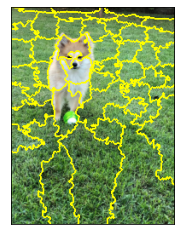

In [9]:
segments_slic = slic(img, start_label=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.imshow(mark_boundaries(img, segments_slic))
plt.xticks([])
plt.yticks([])
plt.show()

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

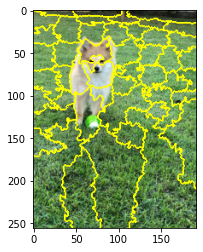

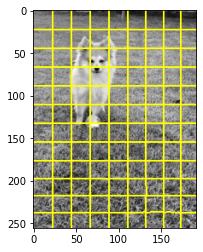

In [10]:
img_float = img_as_float(img)
img_grayscale = rgb2gray(img)

# Segmentation with the image in grayscale
slic_gray = slic(img_grayscale, start_label=1)

# Segmentation with the image in float
slic_float = slic(img_float, start_label=1)

plt.imshow(mark_boundaries(img_float, slic_float))
plt.show()
plt.imshow(mark_boundaries(img_grayscale, slic_gray))
plt.show()

We can see that we cannot convert the image to grayscale and segmentate it with the Slic method after, because it cannot detect correctly the segments. But we can convert the image into float and apply the method, we will obtain the same results as we have obtained in the past.

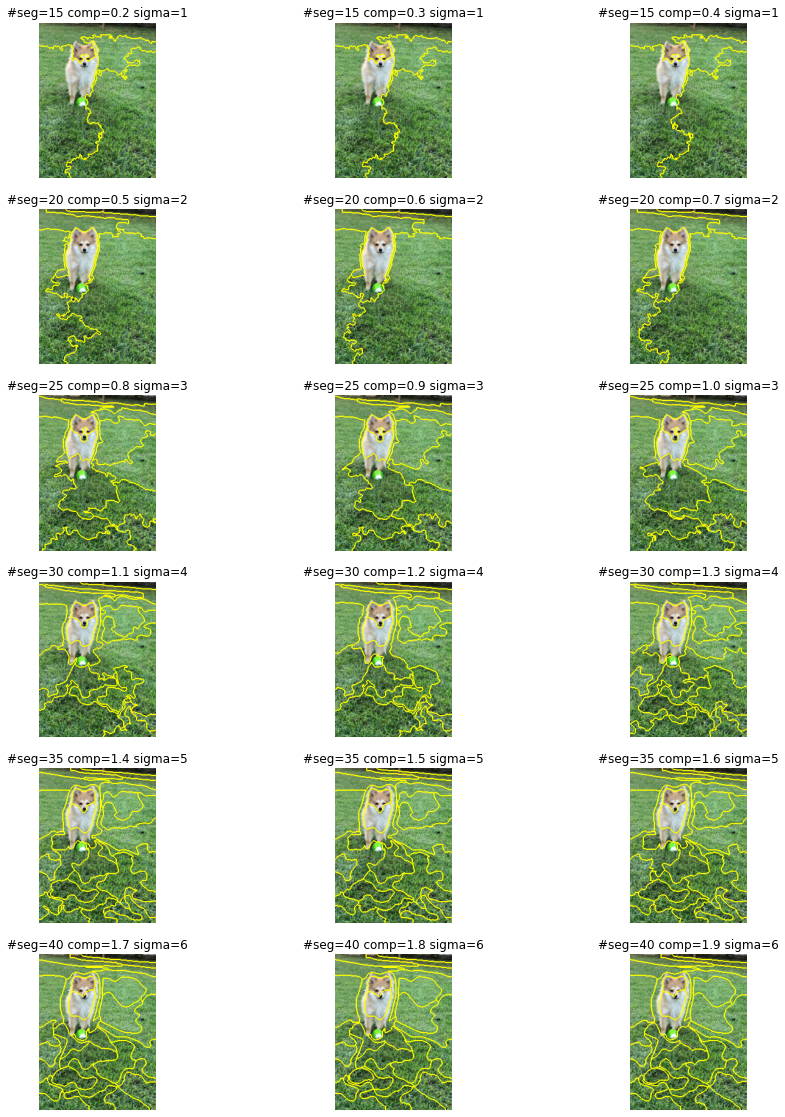

In [11]:
def slic_experiment(im, nseg, comp, sigma, a):
    
    # Compute Slic segments.
    b = slic(im, n_segments=nseg, compactness=comp, sigma=sigma, start_label=1)
    a.axis('off')
    # Mark segments in image.
    a.imshow(mark_boundaries(im, b))
    a.set_title("#seg={} comp={} sigma={}".format(nseg, comp, sigma))
    return a

%matplotlib inline

fig, axs = plt.subplots(6, 3)
fig.set_size_inches(15, 20)
seg, comp, sigma = 15, 0.2, 1
for row in range(6):
    for col in range(3):
        axs[row][col] = slic_experiment(img, seg, round(comp, 3), round(sigma, 3), axs[row][col])
        # Modifying parameters along iterations in order to achieve differents results.
        comp += 0.1
    sigma += 1
    seg += 5
    
plt.show()

Is it important to know about the parameters of the function that implements the algorithm. 

- It has a single *scale* parameter related to the tau parameter that influences the segment size. The parameter scale sets an observation level. Higher scale means less and larger segments.

- *sigma* is the diameter of a Gaussian kernel, used for smoothing the image prior to segmentation

- *min_size* sets the minimum size for each component.

The number of produced segments as well as their size can only be controlled indirectly through scale and themin_size parameter. Segment size within an image can vary greatly depending on local contrast. The actual size and number of segments can vary greatly, depending on local contrast.

From the experiments performed, it could be said that scale=150, sigma=1.8 and min_size=172 would give us a pretty good segmentation.

f) Comment what the algorithm is (in up to 3 lines).

Is it important to know about the parameters of the function that implements the algorithm.

- *n_segments* is an optional parameter that establishes the approximate maximum number of labels in the segmented image

- *compactness* determines color and space proximity

- *sigma* changes the width of the Gaussian kernel used in preprocessing in order to smooth the image. 

From the experiments performed, the best segmentation has been optained with the following parameters: n_segments=20, compactness=0.6, sigma=2

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

Quickshift number of segments: 164


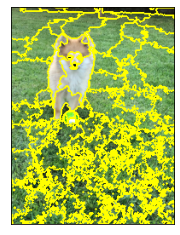

In [12]:
segments_quick = quickshift(img)

print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

plt.imshow(mark_boundaries(img, segments_quick))
plt.xticks([])
plt.yticks([])
plt.show()

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

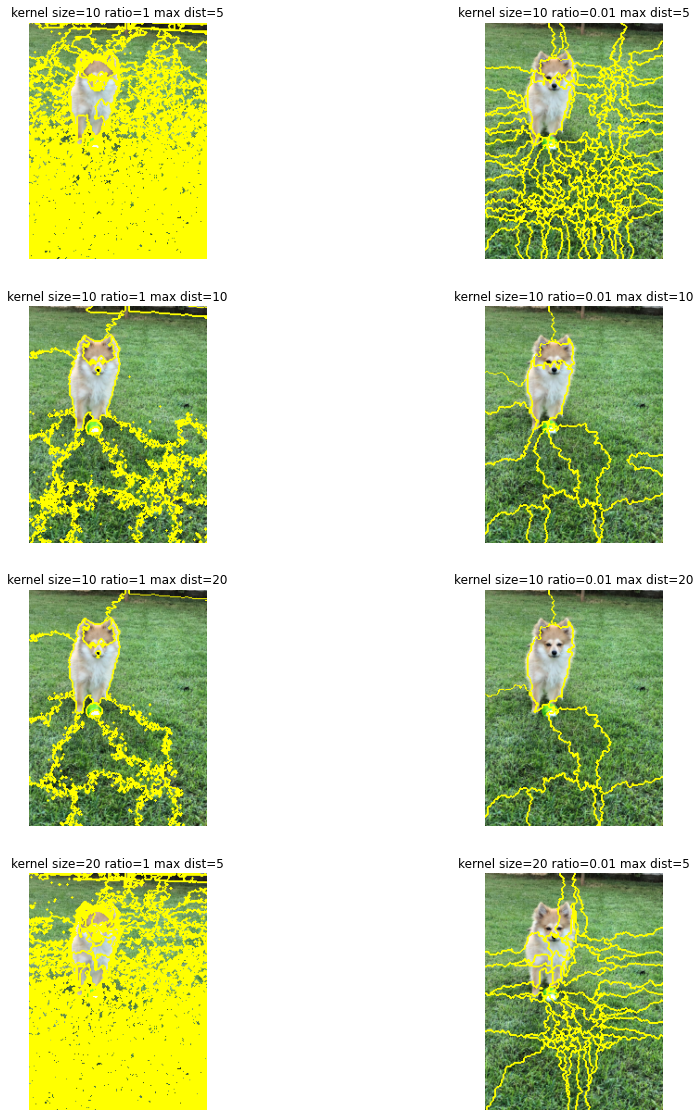

In [13]:
def quickshift_experiment(img, kernel_size, ratio, max_dist, a):
    
    # Compute Quicksift segments.
    b = quickshift(img, kernel_size=kernel_size, ratio=ratio, max_dist=max_dist)
    a.axis('off')
    # Mark segments in image.
    a.imshow(mark_boundaries(img, b))
    a.set_title("kernel size={} ratio={} max dist={}".format(kernel_size, ratio, max_dist))
    return a

%matplotlib inline

fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15, 20)
kernel_list = [10, 10, 10, 20]
max_list = [5, 10, 20, 5]
for row in range(4):
    
    kernel_size = kernel_list[row]
    max_dist = max_list[row]
    
    axs[row][0] = quickshift_experiment(img, kernel_size, 1, max_dist, axs[row][0])
    axs[row][1] = quickshift_experiment(img, kernel_size, 0.01, max_dist, axs[row][1])
    
plt.show()

We can observe that when more smaller is the ratio, more larger are the segments, inversely it happens with the distance, that if it increases, the distance between the segments increases. Finally the kernel size changes the width of the Gaussian kernel used in preprocessing in order to smooth the image.

The optimal values are in this experiment kernel size = 10, ratio = 0.01, max dist = 20.

i) Comment what the algorithm is (in up to 3 lines).

Quickshift is a 2D image segmentation algorithm, based on an approximation of kernelized mean-shift. A clear advantage is that it's a more sophisticated and advanced algorithm than the two previously seen, the main disadvantage is that it's much more computationally complex, as we have observed executing the previous codes that took longer than the other methods.

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

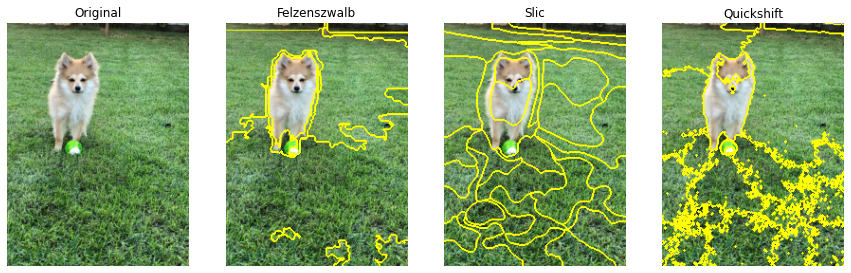

In [14]:
f = felzenszwalb(img, scale=150, sigma=1.8, min_size=172)
s = slic(img, n_segments=40, compactness=1.9, sigma=6, start_label=1)
q = quickshift(img, kernel_size=10, ratio=1, max_dist=10)

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(15, 10)
titles, images = ["Original", "Felzenszwalb", "Slic", "Quickshift"], [img, mark_boundaries(img, f), mark_boundaries(img, s), mark_boundaries(img, q)]
for i in range(len(axs)):
    axs[i].axis('off')
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
plt.show()

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [15]:
# Number of segments is obtained by counting the unique values in the mask obtained with the segmentation algorithms.
print("Felzenszwalb #segments: {}\nSlic #segments: {}\nQuickshift #segments: {}".format(len(np.unique(f)), len(np.unique(s)), len(np.unique(q))))

Felzenszwalb #segments: 14
Slic #segments: 29
Quickshift #segments: 90


The number of segments doesn't have to mean that one method has more performance than another because the quality of the segments also have an important relevation and is very important to know if they have been detected correctly, apart if it's an image with many contours and sudden changes of pixels will probably have more segments than a flatter image.

l) Comment the differences between each method as well as their advantages and disadvantages.

Both Felzenszwalb and Slic are simple algorithms for image segmentation, whereas Quickshift is a little bit sofisticated, however Slic converges to a local minimum of the error function whereas Felzenszwalb does not. Another difference is that Slic has a maximum number of iterations until it stops and Felzenszwalb and Quickshift needs and extra measure for it to stop clusetering. Performance-wise, Slic is quite memory intensive.

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

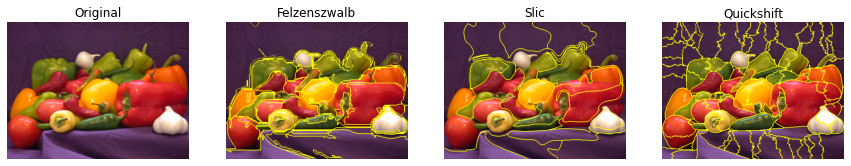

In [16]:
img = io.imread('images/peppers.png')

f = felzenszwalb(img, scale=150, sigma=1.8, min_size=172)
s = slic(img, n_segments=40, compactness=1.9, sigma=6, start_label=1)
q = quickshift(img, kernel_size=10, ratio=1, max_dist=10)

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(15, 10)
titles, images = ["Original", "Felzenszwalb", "Slic", "Quickshift"], [img, mark_boundaries(img, f), mark_boundaries(img, s), mark_boundaries(img, q)]
for i in range(len(axs)):
    axs[i].axis('off')
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
plt.show()

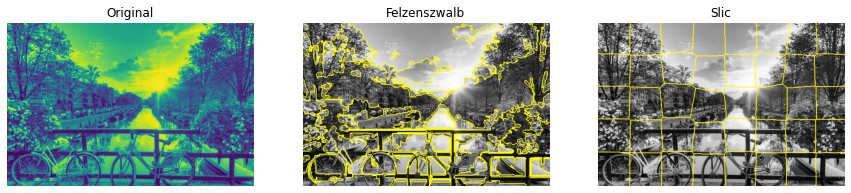

In [19]:
img = io.imread('images/amsterdam.jpg')
img = rgb2gray(img)

f = felzenszwalb(img, scale=150, sigma=1.8, min_size=172)
s = slic(img, n_segments=40, compactness=1.9, sigma=6, start_label=1)
#q = quickshift(img, kernel_size=10, ratio=1, max_dist=10)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15, 10)
titles, images = ["Original", "Felzenszwalb", "Slic"], [img, mark_boundaries(img, f), mark_boundaries(img, s)]
for i in range(len(axs)):
    axs[i].axis('off')
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
plt.show()

We can see that in the grayscale we cannot apply the quickshift method because requires three channels when calling the method (red-green-blue).